In [5]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-paper')
import pickle
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

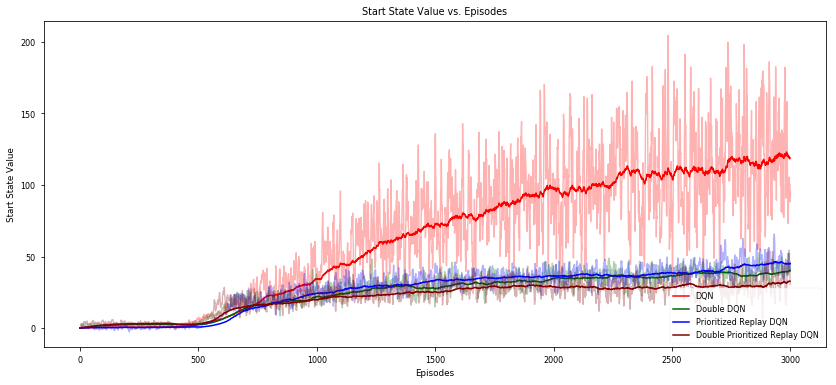

In [32]:
colors = np.array([[255, 0, 0], [0, 100, 0], [0, 0, 255], [128, 0, 0], [255, 0, 255]])
colors = (colors / 255).tolist()
labels = ['DQN', 'Double DQN', 'Prioritized Replay DQN', 'Double Prioritized Replay DQN']

models = ['DQN', 'Double_DQN', 
          'PrioritizedReplayDQN', 'DoublePrioritizedReplayDQN']

for ix, v in enumerate(models):
    with open('DQN/Exp8/{}_StartStateValue.pb'.format(v), 'rb') as f:
        rewards = pickle.load(f)
    roll = pd.Series(np.array(rewards)).rolling(5).mean()
    r = 0.0
    running_r = list()
    for i in rewards:
        r = 0.99 * r + 0.01 * i
        running_r.append(r)
    plt.plot(roll, label=None, color=colors[ix] + [0.3])
    plt.plot(running_r, label=labels[ix], color=colors[ix],  linewidth=1.5)
plt.legend(loc='lower right')
plt.xlabel('Episodes')
plt.ylabel('Start State Value')
plt.title('Start State Value vs. Episodes')
plt.show()